# Quantium Virtual Internship Task 2
In this part, I will be selecting control stores and comparing trial stores to observe how they performed.

## Section 0: Setup

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('QVI_data.csv')

In [3]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


# Section 1: Selecting the Control Stores
In this section, I will need to define a metric which enables me to select control stores from the dataset

I will be looking at the following characteristics on a monthly basis:
* Total sales revenue
* Total number of customers
* Average number of transactions per customer

In [4]:
# create a month column
df['Month_Year'] = pd.to_datetime(df['DATE']).dt.to_period('M')

In [5]:
# group by month and store
df_grouped = df.groupby(['STORE_NBR','Month_Year']).sum()

In [6]:
df_grouped['NBR_CUSTOMERS'] = df.groupby(['STORE_NBR','Month_Year']).count()['LYLTY_CARD_NBR']

In [7]:
df_grouped

LYLTY_CARD_NBR    TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES  \
STORE_NBR Month_Year                                                            
1         2018-07              65903     16010      3082        62      206.9   
          2018-08              54522     13240      2289        54      176.1   
          2018-09              76595     16786      3282        75      278.8   
          2018-10              56910     13745      2562        58      188.1   
          2018-11              60103     15058      2850        57      192.6   
...                              ...       ...       ...       ...        ...   
272       2019-02           13065104  12955455      2736        91      395.5   
          2019-03           14426031  14304893      2813       101      442.3   
          2019-04           15242512  15114508      2837       105      445.1   
          2019-05           10888887  10798140      2328        71      314.6   
          2019-06           10070739   9986107      1918        70      312.1   

                      PACK_SIZE  NBR_CUSTOMERS  
STORE_NBR Month_Year                            
1         2018-07          9113             52  
          2018-08          7798             43  
          2018-09         11148             62  
          2018-10          7807             45  
          2018-11          8339             47  
...                         ...            ...  
272       2019-02          8415             48  
          2019-03          9680             53  
          2019-04          9036             56  
          2019-05          7115             40  
          2019-06          6528             37  

[3169 rows x 7 columns]

In [8]:
df_grouped.drop(['LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PACK_SIZE'], axis = 1, inplace = True)

In [9]:
# create metrics
df_grouped['SALES_PER_CUST'] = df_grouped['PROD_QTY']/df_grouped['NBR_CUSTOMERS']
df_grouped['AVG_PROD_PRICE'] = df_grouped['TOT_SALES']/df_grouped['PROD_QTY']

In [10]:
df_grouped

PROD_QTY  TOT_SALES  NBR_CUSTOMERS  SALES_PER_CUST  \
STORE_NBR Month_Year                                                       
1         2018-07           62      206.9             52        1.192308   
          2018-08           54      176.1             43        1.255814   
          2018-09           75      278.8             62        1.209677   
          2018-10           58      188.1             45        1.288889   
          2018-11           57      192.6             47        1.212766   
...                        ...        ...            ...             ...   
272       2019-02           91      395.5             48        1.895833   
          2019-03          101      442.3             53        1.905660   
          2019-04          105      445.1             56        1.875000   
          2019-05           71      314.6             40        1.775000   
          2019-06           70      312.1             37        1.891892   

                      AVG_PROD_PRICE  
STORE_NBR Month_Year                  
1         2018-07           3.337097  
          2018-08           3.261111  
          2018-09           3.717333  
          2018-10           3.243103  
          2018-11           3.378947  
...                              ...  
272       2019-02           4.346154  
          2019-03           4.379208  
          2019-04           4.239048  
          2019-05           4.430986  
          2019-06           4.458571  

[3169 rows x 5 columns]

In [27]:
df_77 = df_grouped.loc[77]
df_86 = df_grouped.loc[86]
df_88 = df_grouped.loc[88]

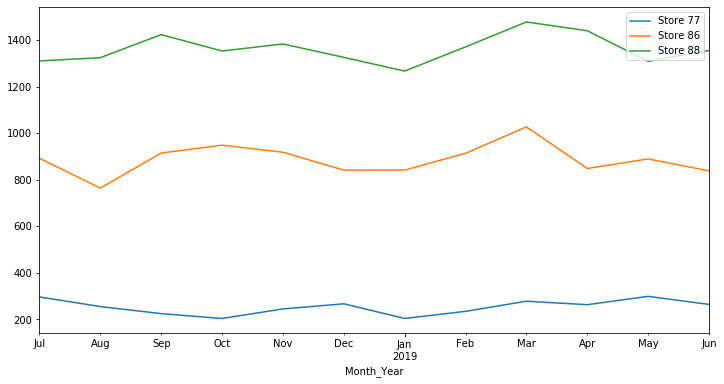

In [36]:
ax = df_77.plot(y='TOT_SALES', figsize=(12,6))
df_86.plot(ax=ax,y='TOT_SALES')
df_88.plot(ax=ax,y='TOT_SALES')
ax.legend(['Store 77', 'Store 86', 'Store 88'])

In [38]:
# create comparison function
def storeCompare(store1, store2):
    pass